## <center> Painting Epi-plane with Julia </center>

We will paint the epi-plane with the data we obtained using OpenCV in python.

In [1]:
# We will use library DataFrames to deal with DataFrames in csv
using DataFrames
using PyPlot

In [2]:
df_church = readtable("./church_tracking.csv")
df_couch = readtable("./couch_tracking.csv");

Under the assumption that the camera followed a straight line while taking the differrent pictures one can assume also that the points follow a straight line path, so we will just take in account the $x$ coordinate and the time $t$ variables.

In [3]:
# Storage the x and y entries in the time of the points
x_church = df_church[2:2:202]
y_church = df_church[3:2:203];

In [4]:
# Import the first image
church_first = imread("./../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0000_lowres.jpg")
church_last = imread("./../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0100_lowres.jpg");

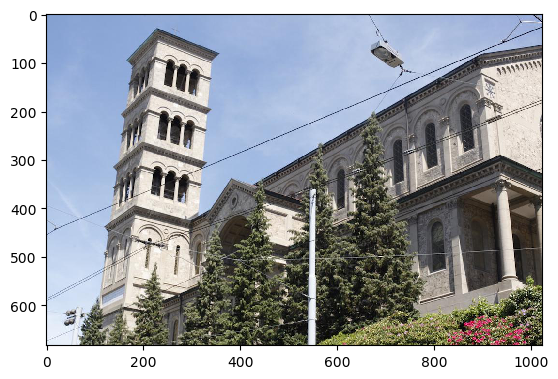

PyObject <matplotlib.image.AxesImage object at 0x3288f3410>

In [5]:
imshow(church_first)

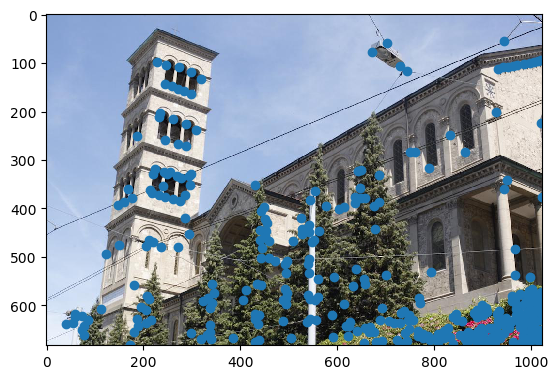

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x328afab10>

In [6]:
# Lets plot the tracked points at the first image
imshow(church_first)
plot(x_church[1],y_church[1],"o")

One can identify clusters of points that are part of a certain feature; we are going to identify the next features:
- Three Bush (in order from front to back): bush1, bush2, bush3
- Six Trees (in order from front to back): tree1,...,tree6
- Two Lamppost (in order from front to back): lamppost1, lamppost2
- Front Wall: frontwall
- Front Window High: window1
- Back Window High: window2
- Window Low: window3
- Circle Window: window4
- Window Low: window4
- Left Pillar: pillar1
- Right Pillar: pillar2
- Three Cables (in order from high to low): cable1, cable2, cable3
- High Lamp: highlamp
- Tower: tower

In [8]:
# Function to extract features in terms limits
function extract(x_church,y_church,i,x_min,x_max,y_min,y_max)
    idx = (y_church[i].< y_max).*(y_church[i].> y_min).*(x_church[i].< x_max).*(x_church[i].> x_min)
    feature_x = x_church[idx,:]
    feature_y = y_church[idx,:]
    return feature_x,feature_y
end

extract (generic function with 1 method)

### Extraction of features by clusters of points

In [9]:
# all points
points_x, points_y = extract(x_church,y_church,1,0,1024,0,683);

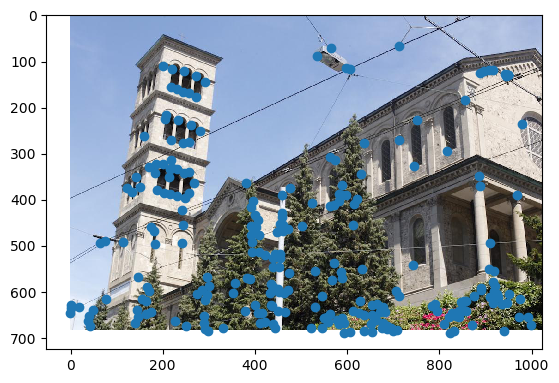

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32d2b3890>

In [11]:
i=100
array_x= points_x
array_y = points_y
imshow(church_last)
plot(array_x[i][~isna(array_x[i])],array_y[i][~isna(array_x[i])],"o")

In [697]:
bush1_x, bush1_y = extract(x_church,y_church,1,800,1200,540,1200);
bush2_x, bush2_y = extract(x_church,y_church,1,700,800,600,1200);
bush3_x, bush3_y = extract(x_church,y_church,1,600,700,608,1200);
tree1_x1, tree1_y1 = extract(x_church,y_church,1,620,745,325,500);
tree1_x2, tree1_y2 = extract(x_church,y_church,1,599,780,500,645);
tree1_x = vcat(tree1_x1,tree1_x2);
tree1_y = vcat(tree1_y1,tree1_y2);
tree2_x1, tree2_y1 = extract(x_church,y_church,1,561,600,200,683);
tree2_x2, tree2_y2 = extract(x_church,y_church,1,490,537,200,683);
tree2_x = vcat(tree2_x1,tree2_x2);
tree2_y = vcat(tree2_y1,tree2_y2);
tree3_x, tree3_y = extract(x_church,y_church,1,380,489,200,683);
tree4_x, tree4_y = extract(x_church,y_church,1,280,378,500,683);
tree5_x, tree5_y = extract(x_church,y_church,1,170,230,580,683);
tree6_x1, tree6_y1 = extract(x_church,y_church,1,90,140,600,683);
tree6_x2, tree6_y2 = extract(x_church,y_church,1,70,90,640,683);
tree6_x = vcat(tree6_x1,tree6_x2);
tree6_y = vcat(tree6_y1,tree6_y2);
lamppost1_x, lamppost1_y = extract(x_church,y_church,1,538,560,200,683);
lamppost2_x, lamppost2_y = extract(x_church,y_church,1,0,69,200,683);
frontwall_x, frontwall_y = extract(x_church,y_church,1,900,1024,70,120);
window1_x, window1_y = extract(x_church,y_church,1,850,865,250,350);
window2_x, window2_y = extract(x_church,y_church,1,750,840,284,350);
window3_x, window3_y = extract(x_church,y_church,1,750,840,500,580);
window4_x, window4_y = extract(x_church,y_church,1,1000,1024,190,250);
pillar1_x1, pillar1_y1 = extract(x_church,y_church,1,900,1000,520,539);
pillar1_x2, pillar1_y2 = extract(x_church,y_church,1,900,1000,300,400);
pillar1_x = vcat(pillar1_x1,pillar1_x2);
pillar1_y = vcat(pillar1_y1,pillar1_y2);
pillar2_x, pillar2_y = extract(x_church,y_church,1,1000,1024,300,400);
cable1_x, cable1_y = extract(x_church,y_church,1,900,1024,0,60);
cable2_x1, cable2_y1 = extract(x_church,y_church,1,650,1000,190,282);
cable2_x2, cable2_y2 = extract(x_church,y_church,1,207,230,450,500);
cable2_x = vcat(cable2_x1,cable2_x2);
cable2_y = vcat(cable2_y1,cable2_y2);
cable3_x1, cable3_y1 = extract(x_church,y_church,1,950,1000,450,500);
cable3_x2, cable3_y2 = extract(x_church,y_church,1,200,208,450,500);
cable3_x3, cable3_y3 = extract(x_church,y_church,1,250,290,450,500);
cable3_x = vcat(cable3_x1,cable3_x2);
cable3_y = vcat(cable3_y1,cable3_y2);
cable3_x = vcat(cable3_x,cable3_x3);
cable3_y = vcat(cable3_y,cable3_y3);
highlamp_x, highlamp_y = extract(x_church,y_church,1,650,750,50,150);
tower_x, tower_y = extract(x_church,y_church,1,100,350,0,438);

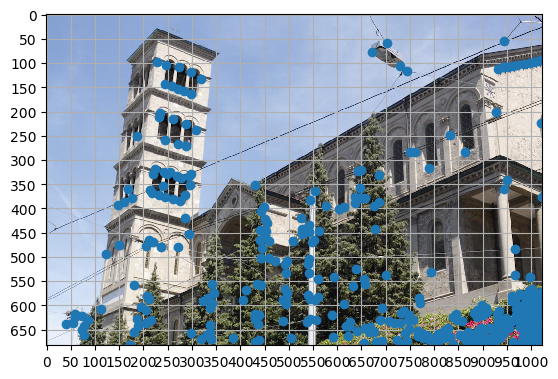

In [698]:
i=1
array_x= points_x
array_y = points_y
imshow(church_first)
plot(array_x[i][~isna(array_x[i])],array_y[i][~isna(array_x[i])],"o")
xticks(0:50:1024)
yticks(0:50:693)
grid("on")

In [699]:
i=1
j=100
array_x= tower_x
array_y = tower_y;

In [700]:
minimum(array_x[:x1]), maximum(array_x[:x1]),minimum(array_y[:y1]), maximum(array_y[:y1]) 

(148.0,318.0,98.0,419.0)

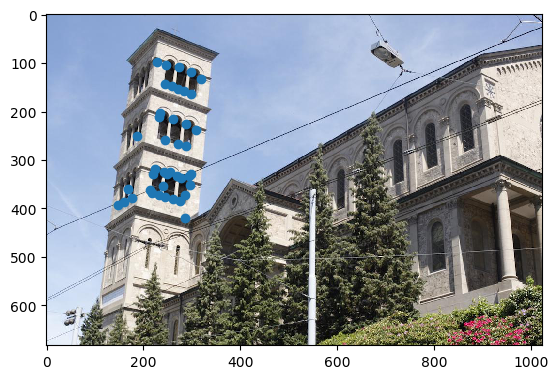

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3619c5710>

In [701]:
imshow(church_first)
plot(array_x[i][~isna(array_x[i])],array_y[i][~isna(array_x[i])],"o")

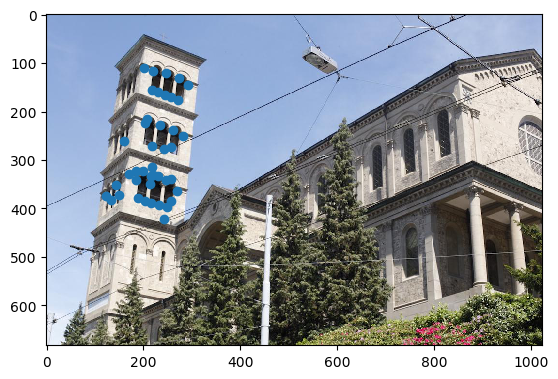

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x361d507d0>

In [702]:
imshow(church_last)
plot(array_x[j][~isna(array_x[j])],array_y[j][~isna(array_x[j])],"o")